In [178]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = '../data/raw_data/'

df_categories = pd.read_csv(f'{folder}df_categories_ai.csv')
df_comments = pd.read_csv(f'{folder}df_comments_video_ai.csv', engine='python', on_bad_lines='skip')
df_transcript = pd.read_csv(f'{folder}df_transcript_original_ai.csv')
df_videos = pd.read_csv(f'{folder}df_video_ai.csv')
df_search = pd.read_csv(f'{folder}df_video_search_ids_ai.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data_ai.csv')

# Clean df_channel_data

In [31]:
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        2010 non-null   object
 1   title             2010 non-null   object
 2   description       1857 non-null   object
 3   published_at      2010 non-null   object
 4   subscriber_count  2010 non-null   int64 
 5   video_count       2010 non-null   int64 
 6   view_count        2010 non-null   int64 
 7   region            1583 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.8+ KB


In [32]:
# Drop wrong fetch data 
df_channel.dropna(subset=['view_count'], inplace=True)

# Change to datetime
df_channel['published_at'] = pd.to_datetime(df_channel['published_at'], format='mixed')

# Export cleaned data
df_channel.to_csv('../data/clean_data/df_channel_data.csv', index=False)

# Show info cleaned
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   channel_id        2010 non-null   object             
 1   title             2010 non-null   object             
 2   description       1857 non-null   object             
 3   published_at      2010 non-null   datetime64[ns, UTC]
 4   subscriber_count  2010 non-null   int64              
 5   video_count       2010 non-null   int64              
 6   view_count        2010 non-null   int64              
 7   region            1583 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 125.8+ KB


# Clean df_video_data

In [33]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   videoId         2711 non-null   object
 1   title           2711 non-null   object
 2   channelId       2711 non-null   object
 3   description     2535 non-null   object
 4   publishedAt     2711 non-null   object
 5   thumbnail_url   2711 non-null   object
 6   tags            2711 non-null   object
 7   live_broadcast  2711 non-null   object
 8   categoryId      2711 non-null   int64 
 9   viewCount       2711 non-null   int64 
 10  likeCount       2711 non-null   int64 
 11  commentCount    2711 non-null   int64 
 12  licensed        2711 non-null   bool  
 13  duration        2711 non-null   object
 14  caption         2711 non-null   bool  
 15  language        2711 non-null   object
dtypes: bool(2), int64(4), object(10)
memory usage: 301.9+ KB


In [34]:
import isodate

# Remove duplicated video 
df_videos.drop_duplicates(subset=['videoId'], keep='first', inplace=True)

# Convert ISO 8601 duration to a readable format (timedelta)
def convert_duration(duration_str):
    duration = isodate.parse_duration(duration_str)
    return duration.seconds

# Change duration to total seconds
df_videos['duration'] = df_videos['duration'].apply(convert_duration)

# Drop live broadcast column and Unnamed 0
df_videos.drop(columns=['live_broadcast'], inplace=True)

# Export the cleaned data
df_videos.to_csv('../data/clean_data/df_video_data.csv', index=False)

df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   videoId        2711 non-null   object
 1   title          2711 non-null   object
 2   channelId      2711 non-null   object
 3   description    2535 non-null   object
 4   publishedAt    2711 non-null   object
 5   thumbnail_url  2711 non-null   object
 6   tags           2711 non-null   object
 7   categoryId     2711 non-null   int64 
 8   viewCount      2711 non-null   int64 
 9   likeCount      2711 non-null   int64 
 10  commentCount   2711 non-null   int64 
 11  licensed       2711 non-null   bool  
 12  duration       2711 non-null   int64 
 13  caption        2711 non-null   bool  
 14  language       2711 non-null   object
dtypes: bool(2), int64(5), object(8)
memory usage: 280.8+ KB


# Clean df_comments_video

In [3]:
df_comments.info()
pd.isnull(df_comments).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185382 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         185382 non-null  object 
 1   author             185003 non-null  object 
 2   author_channel_id  185109 non-null  object 
 3   text               185109 non-null  object 
 4   like_count         184944 non-null  float64
 5   published_at       184944 non-null  object 
 6   updated_at         184779 non-null  object 
 7   totalReplyCount    184779 non-null  float64
 8   video_id           184779 non-null  object 
dtypes: float64(2), object(7)
memory usage: 12.7+ MB


comment_id             0
author               379
author_channel_id    273
text                 273
like_count           438
published_at         438
updated_at           603
totalReplyCount      603
video_id             603
dtype: int64

In [36]:
# Drop na values
df_comments.dropna(inplace=True)

# Transform data to correct type
df_comments['like_count'] = df_comments['like_count'].astype('float64')
df_comments['published_at'] = pd.to_datetime(df_comments['published_at'])
df_comments['updated_at'] = pd.to_datetime(df_comments['updated_at'])

# Export cleaned data
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184673 entries, 0 to 185381
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   comment_id         184673 non-null  object             
 1   author             184673 non-null  object             
 2   author_channel_id  184673 non-null  object             
 3   text               184673 non-null  object             
 4   like_count         184673 non-null  float64            
 5   published_at       184673 non-null  datetime64[ns, UTC]
 6   updated_at         184673 non-null  datetime64[ns, UTC]
 7   totalReplyCount    184673 non-null  float64            
 8   video_id           184673 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2), object(5)
memory usage: 14.1+ MB


In [37]:
df_comments = pd.read_parquet('../data/clean_data/df_comments_video.parquet')

# Clean df_transcript

In [5]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1787 non-null   object
 1   original_language  1787 non-null   object
 2   transcription      1787 non-null   object
dtypes: object(3)
memory usage: 42.0+ KB


In [39]:
# Drop duplicated values
df_transcript.drop_duplicates(subset=['video_id'], inplace=True)

# Cleaned language values
def get_cleaned_name(str):
    return str.split(' ')[0].strip().lower()

df_transcript['language'] = df_transcript['original_language'].apply(get_cleaned_name)

# Export dataframe
df_transcript.to_csv('../data/clean_data/df_transcript_original.csv')

df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           1787 non-null   object
 1   original_language  1787 non-null   object
 2   transcription      1787 non-null   object
 3   language           1787 non-null   object
dtypes: object(4)
memory usage: 56.0+ KB


# Load Clean Data

In [10]:
folder = '../data/clean_data/'

df_categories = pd.read_csv(f'{folder}df_categories.csv')
df_comments = pd.read_parquet(f'{folder}df_comments_video.parquet')
df_transcript = pd.read_csv(f'{folder}df_transcript_original.csv')
df_videos = pd.read_csv(f'{folder}df_video_data.csv')
df_channel = pd.read_csv(f'{folder}df_channel_data.csv')

# Normalize comments and transcriptions

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Descargar recursos de NLTK si no están descargados
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador en inglés
lemmatizer = WordNetLemmatizer()

# Cargar las stopwords en inglés
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Apply function to english comments
df_comments['clean_text'] = df_comments[df_comments['language'] == 'en']['text'].apply(preprocess_text)

In [15]:
# Load transcript data
df_transcript = pd.read_csv('../data/clean_data/df_transcript_original.csv')

# Preprocess transcripts
df_transcript['clean_text'] = df_transcript[df_transcript['original_language'] == 'English (auto-generated)']['transcription'].apply(preprocess_text)

In [16]:
df_transcript['clean_text']

0       music thank hello everyone hope great era ai w...
1       number three music facebook enacted emergency ...
2       series going introduce deep learning least per...
3       earn money ai part two let go want create kind...
4       current medical science run option doctor dont...
                              ...                        
1782    machine learning big data changing econometric...
1783    music applause thanks much hadley thank coming...
1784                                                  NaN
1785    happened last year made urgent long time worki...
1786    there saying go great power come great respons...
Name: clean_text, Length: 1787, dtype: object

# Translate Comments to English

Text(0.5, 1.0, 'Videos with n_comments')

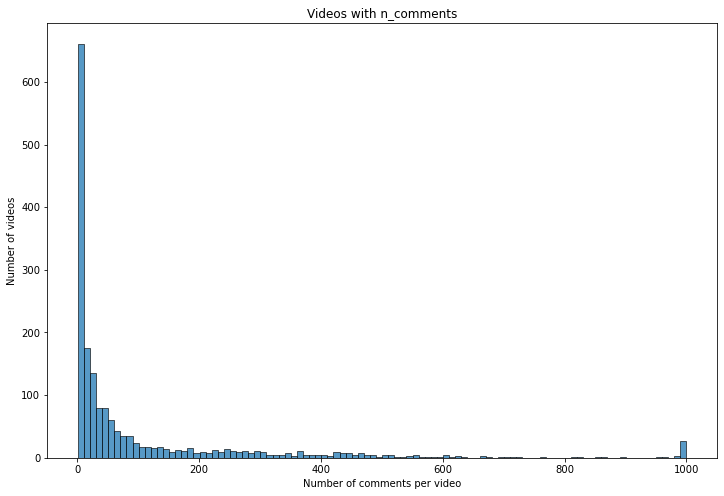

In [58]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df_comments['video_id'].value_counts(), bins=100, kde=False)
plt.xlabel('Number of comments per video')
plt.ylabel('Number of videos')
plt.title('Videos with n_comments')

In [5]:
from langdetect import detect, DetectorFactory, LangDetectException
from nltk.corpus import stopwords

# Create a column with language detected
def detect_language(text):
    try:
        # Verificar si el texto es lo suficientemente largo
        if len(text.strip()) == 0:
            return None
        # Intentar detectar el idioma
        language = detect(text)
        return language
    except LangDetectException:
        # Si el texto es demasiado corto o no se puede detectar el idioma, devolver None
        return None

In [56]:
# df_comments['language'] = df_comments['text'].apply(detect_language)

In [59]:
df_comments.to_parquet('../data/clean_data/df_comments_video.parquet', index=False)

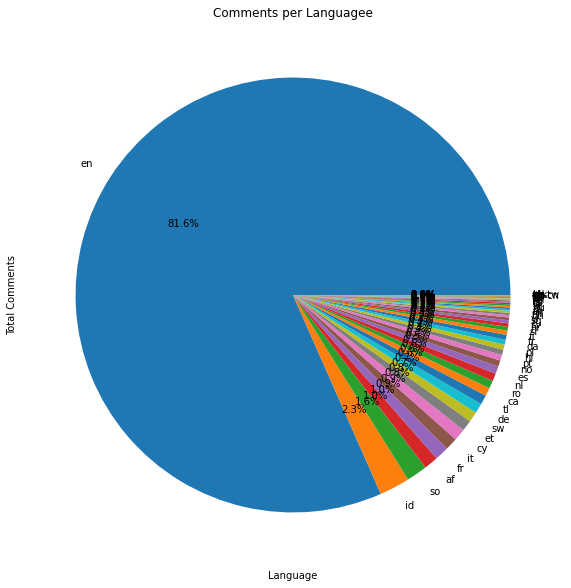

In [71]:
plt.figure(figsize=(20,10))
df_comments['language'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Language')
plt.ylabel('Total Comments')
plt.title('Comments per Languagee')
plt.show();

# Translate all non-english comments to english

In [73]:
from deep_translator import GoogleTranslator

def translate_text(text, target_language='en'):
    translator = GoogleTranslator(source='auto', target=target_language)
    return translator.translate(text)

In [79]:
# Translate non-english comments to english
# df_comments['translation'] = df_comments[df_comments['language'] != 'en']['text'].apply(translate_text)

In [122]:
df_comments[df_comments['language'] != 'en']['text'].iloc[:10].apply(translate_text)

0       great video,helpful.
10                   Awesome
11      ultimate information
15            important one.
20       very fruitful video
22                 Excellent
24                     great
27                   amazing
29    Alhamdulillah. perfect
31            highly amazing
Name: text, dtype: object

# Sentiment Analysis Comments from HuggingFace models

In [7]:
df_comments = pd.read_parquet('../data/clean_data/df_comments_video.parquet')

In [11]:
from googletrans import Translator
from transformers import AutoTokenizer, RobertaModel
import torch

# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
translator = Translator()

# Ejemplo de comentarios
comments = df_comments.head(10)['text']

# Función para traducir y analizar el sentimiento
def analizar_sentimiento(text):
    # Traducir comentario al inglés
    translated = translate_text(text)
    # Analizar sentimiento
    resultado = pipe(translated)[0]
    return int(resultado['label'][0])

# Aplicar análisis a cada comentario
results = [analizar_sentimiento(text) for text in comments]

# Crear un DataFrame
df = pd.DataFrame({'comment': comments, 'sentiment': results})
df.head(10)

/home/ivanseldasp/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,comment,sentiment
0,"great video,helpful.",5
1,Thank you for such well explained video tutorial,5
2,"very useful tools , thanks for sharing this in...",5
3,This is great information and a terrific use o...,5
4,first two are not goof but all other AI id the...,5
5,Informative,4
6,I am 66 years old and very elementary in techn...,5
7,more informative and awesome for researchers,5
8,Thanks for creating and sharing these video.,5
9,nice narration and proper info about useful AI...,4


In [44]:
df_comments['text'][236]

'Its Hard to decode but i try it.<br><br><b>*Bob: &quot;i can i i everything else&quot;*</b><br>- Bob is likely indicating that it can take on everything else not explicitly mentioned. The repetition of &quot;i&quot; might be a way to emphasize its willingness or capacity.<br><br><b>*Alice: &quot;balls have zero to me to me to me to me to me to me to me to&quot;*</b><br>- Alice is suggesting that balls (or a specific item) have no value to her. The repetition of &quot;to me&quot; reinforces that these items are not beneficial or needed by her.<br><br><b>*Bob: &quot;you i i everything else&quot;*</b><br>- Bob is proposing that Alice can take certain items while it will take everything else.<br><br><b>*Alice: &quot;balls have a ball to me to me to me to me to me to me to me to&quot;*</b><br>- Alice is now indicating that the balls (or a specific item) have some value (&quot;a ball&quot;) to her, though it’s still not clear how much.<br><br><b>*Bob: &quot;i i can i i everything else&quot;

In [45]:
# Get the emotions of the comments
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = df_comments.iloc[236]['text']

model_outputs = [classifier(sentence) for sentence in sentences]

/home/ivanseldasp/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
